# Introduction


One of the biggest concerns in today's world is being able to use data to measure customer satisfaction. For this project, a startup involved with logistics and delivery was attempting to examine what made customers Happy or Unhappy based upon survey response data they acquired. The data would then be used to determine what factors were most important for determining overall customer happiness. The following data was provided:

    Y: The target attribute measuring customer Happiness on a scale of 0 (Unhappy) or 1 (Happy)
    X1: The order was delivered in a timely manner
    X2: The contents of the order were as expected
    X3: Everything that was ordered was included
    X4: The amount paid of the order felt fair to the customer
    X5: Satisfaction with the courier making the delivery
    X6: The application made ordering easier

The X attributes were measured on a scale of 1-5 with values closer to 1 indicating less satisfaction and values closer to 5 indicate higher satisfaction.

In [166]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE

df = pd.read_csv(r"C:\Users\crozi\Documents\ACME-HappinessSurvey2020.csv")

seed = random.randint(1000, 9999)
#seed = 6702, 9613, 4348, 6216, 3143
print(seed)

3143


# Data Analytics

### Data Description

By looking at the data using df.describe(), we can get a better view of the data and see several important figures associated it with it including the mean, std, min and max values for each variable, and a rough idea of the distribution of the scores. Looking at the data, we can draw a few conclusions:
- There were a total of 126 responses, and no missing responses for any variable within the data
- The mean for 'Y' was .55, indicating 55% of respondents were 'Happy' with the results of their delivery
- The highest mean scores for given 'X' variables were X1 with a mean score of 4.33 followed closely by X6 with a mean score of 4.25
- The lowest score for a given 'X' variable was X2, with a mean score of 2.53

In [2]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


### Data Correlation

A heatmap was created to explore the correlation that exists between the variables. The heatmap is using a blue colorscheme with darker blues indicating a low, potentially negative correlation between variables while lighter blues indicate a high level of correlation. After inspecting, it appears that there is no strong correlation between the 'Y' variable and any of the 'X' variables. Additionally, none of the 'X' variables seem to have a strong correlation with each other. Two mild correlations between 'X' variables exist, with a mild correlation of .43 between X1 and X5 as well as a mild correlation of .41 between X1 and X6.

<Axes: >

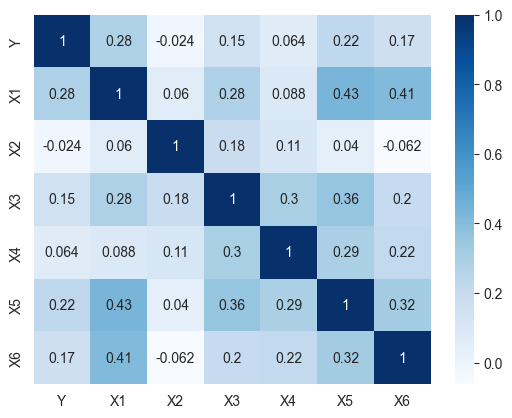

In [4]:
corr = df.corr()
sb.heatmap(corr, cmap='Blues', annot=True)

# Graphical Displays of the Data

### Count of Ratings for 'X' values

The initial graphs shown are histograms displaying a count of the ratings scores for the 'X' values. The initial Histogram shows a clustered version to give a better visualization of how the distribution looks overall with the scores, while the following Histograms dive deeper and make it much easier to see how the scores for each 'X' value are distributed. From the first chart, we can get an easy visual representation that most of the lower scores are with the X2 value, while the vast majority of scores of other scores are shown to be distributed more in the middle or higher.

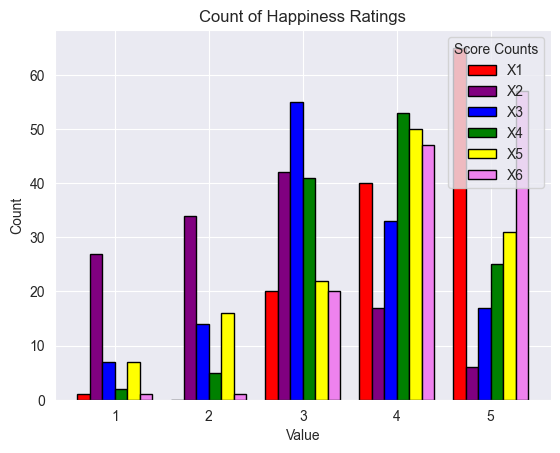

In [5]:
filter_df = df.drop(columns=['Y'])

colors = ['red', 'purple', 'blue', 'green', 'yellow', 'violet']
labels = filter_df.columns

plt.hist(filter_df, bins=np.arange(1, 7) - 0.5, color=colors, edgecolor='black', align='mid', label=labels)

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of Happiness Ratings')
plt.legend(title='Score Counts', loc='upper right')

plt.show()

The following charts make it much easier to track score fo the individual 'X' values with blue values representing 'Unhappy' values tied to that 'X' score and orange colors representing 'Happy' scores tied to that 'X' score. One interesting piece of information that is shown by doing this is that the X3 value has the most scores of 3 for both Happy and Unhappy.

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5
         Y Variable  Values
0  Unhappy       X1       3
1  Unhappy       X1       3
2    Happy       X1       5
3  Unhappy       X1       5
4  Unhappy       X1       5


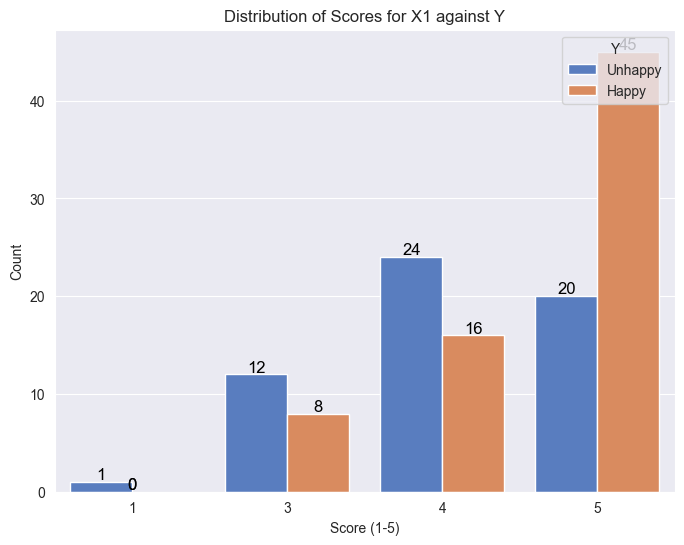

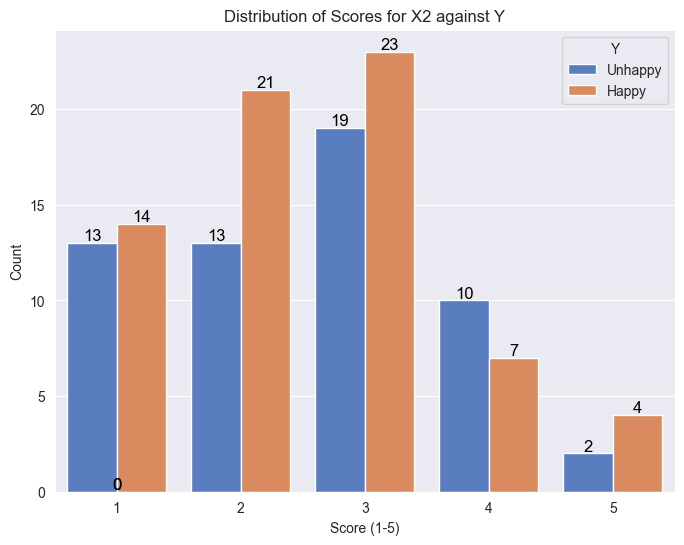

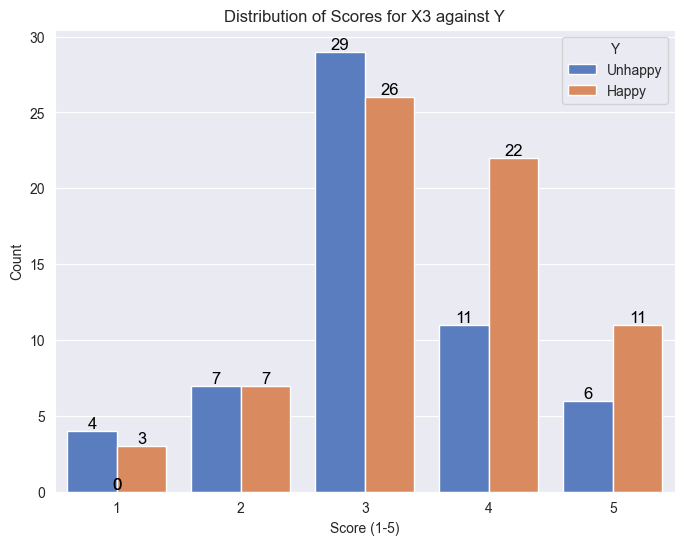

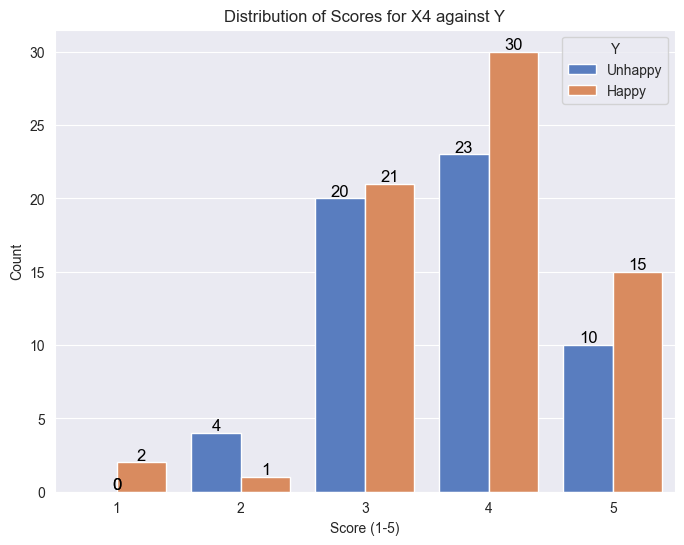

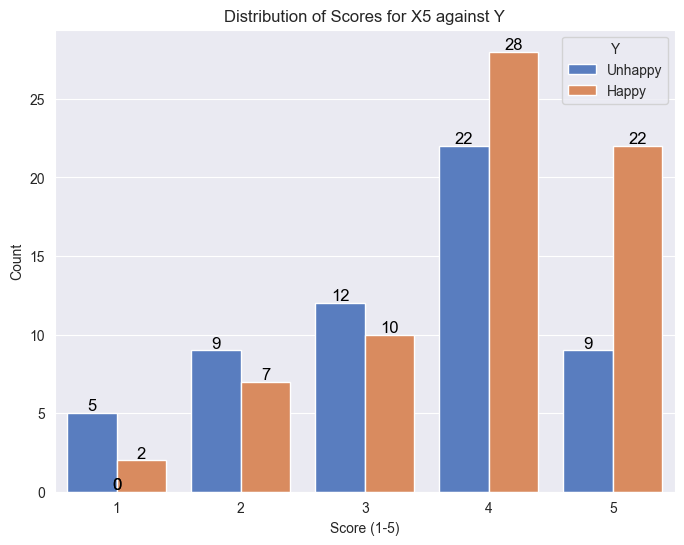

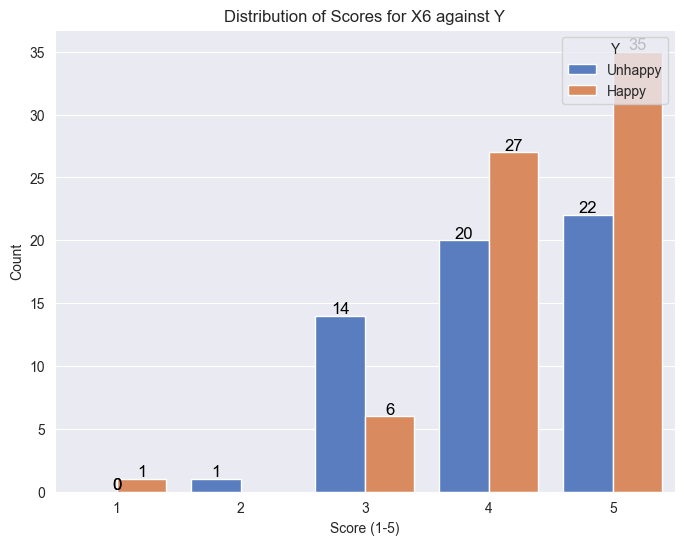

In [6]:
df = pd.read_csv(r"C:\Users\crozi\Documents\ACME-HappinessSurvey2020.csv")
print(df.head())

df['Y'] = df['Y'].map({0: 'Unhappy', 1: 'Happy'})

long_df = pd.melt(df, id_vars=['Y'], var_name='Variable', value_name='Values')

print(long_df.head())

x_variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

for var in x_variables:
    var_df = long_df[long_df['Variable'] == var]

    plt.figure(figsize=(8, 6))
    ax = sb.countplot(data=var_df, x='Values', hue='Y', hue_order=('Unhappy', 'Happy'), palette='muted')

    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title(f'Distribution of Scores for {var} against Y')
    plt.xlabel('Score (1-5)')
    plt.ylabel('Count')
    plt.legend(title='Y', loc='upper right')

    plt.show()

### Violin Plots

Violin plots were created to try and infer any additional information that could not be seen with the histograms. The score distributions help provide more visual reference to where user scores landed, with larger curves indicating more scores in that region. An additional violin plot was provided to show the differences in the curves between the 'Y' scores for Happy and Unhappy.

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5


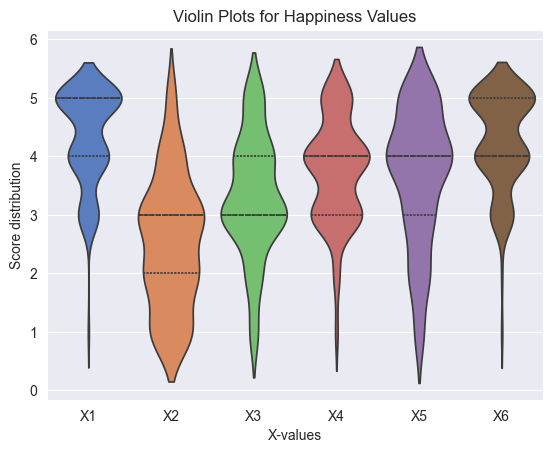

In [6]:
print(df.head())

long_df = pd.melt(df, id_vars=['Y'], value_vars=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'],
                  var_name='Variables', value_name='Values')

sb.violinplot(x='Variables', y='Values', data=long_df, inner="quart", palette="muted")

plt.title("Violin Plots for Happiness Values")
plt.xlabel("X-values")
plt.ylabel("Score distribution")
plt.show()

   Y Variable  Values
0  0       X1       3
1  0       X1       3
2  1       X1       5
3  0       X1       5
4  0       X1       5


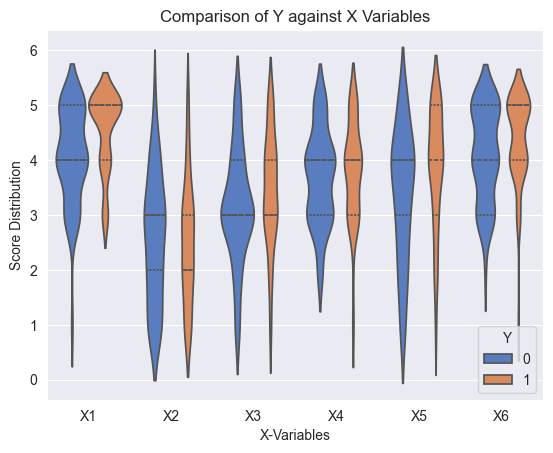

In [7]:
long_df = pd.melt(df, id_vars=['Y'], var_name='Variable', value_name='Values')

print(long_df.head())

sb.violinplot(x='Variable', y='Values', hue='Y', data=long_df, inner="quart", palette="muted")

plt.title("Comparison of Y against X Variables")
plt.xlabel("X-Variables")
plt.ylabel("Score Distribution")

plt.show()

### Final Observations

Based upon the charts shown, we can make some final observations:
- X1: Has the highest mean score with a vast majority of Happy customers giving a 5 rating. Unhappiness ratings were more in the middle with scores between 3-5, indicating little correlation for Unhappiness but a high correlation for Happiness.
- X2: Most of the user ratings scored between 1-3 for both Unhappiness and Happiness, no correlation is noticeable.
- X3: The largest concentration of Unhappiness scores were given a 3, but apart from that the other unhappiness scores are distributed somewhat evenly. However, Happiness scores tend to rise with higher scores in this category, indicating a positive correlation for Happiness.
- X4: The score rating for Unhappy and Happy customers are very close, so much that there is not noticeable difference or correlation that can be drawn.
- X5: A noticeable rise in scores for Happy customers indicating a positive correlation.
- X6: Overall, the scores tended to rise for both Unhappy and Happy customers. No correlation can be drawn as a result.

# Building the Model and Selecting the Evaluation Methods

The next phase was to break the model up into training and tests phases. I then went and evaluated what models might be a good fit for testing after using LazyClassifier to check and see what had decent accuracy scores. I ultimately choose to use RandomForestClassifier, ExtraTreesClassifier, and Logistic Regression because of their usefulness with checking binary regression. The results for the models are shown below, with my biggest goals being to check for the highest level of recall for Unhappiness and the overall accuracy of the models.

In [167]:
def load_and_split_data(csv_path, y_column, x_columns, test_size=0.2):

    X = df[x_columns]
    y = df[y_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    return X_train, X_test, y_train, y_test

y_column = "Y"
x_columns = ["X1", "X2", "X3", "X4", "X5", "X6"]

X_train, X_test, y_train, y_test = load_and_split_data(r"C:\Users\crozi\Documents\ACME-HappinessSurvey2020.csv", y_column, x_columns)

print("X_train:\n", X_train)
print("\nX_test:\n", X_test)
print("\ny_train:\n", y_train)
print("\ny_test:\n", y_test)
print(seed)

X_train:
      X1  X2  X3  X4  X5  X6
52    5   2   4   3   4   5
16    5   3   4   5   4   5
97    5   4   5   4   5   4
39    4   4   3   4   2   4
8     4   1   4   4   4   4
..   ..  ..  ..  ..  ..  ..
10    3   2   3   3   2   3
56    5   1   1   5   3   5
50    5   1   3   3   4   4
122   5   2   3   4   2   5
37    5   3   4   3   4   5

[100 rows x 6 columns]

X_test:
      X1  X2  X3  X4  X5  X6
38    5   2   3   3   2   5
60    4   3   3   3   3   5
115   5   3   5   4   5   5
12    5   2   4   5   5   5
79    5   5   5   5   5   5
36    5   3   4   3   4   5
67    4   1   1   3   4   4
100   5   2   2   4   5   5
111   5   3   3   4   4   4
35    4   2   3   3   4   4
107   4   2   4   4   4   4
1     3   2   3   5   4   3
81    3   3   3   3   3   4
108   5   2   4   4   5   5
47    1   1   1   3   1   4
68    5   1   5   5   5   5
59    5   2   4   2   2   4
105   5   1   4   3   5   5
42    5   2   3   3   4   5
43    4   3   3   4   2   4
58    5   3   5   5   4   5
54  

In [168]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 32/32 [00:00<00:00, 85.09it/s]

[LightGBM] [Info] Number of positive: 54, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540000 -> initscore=0.160343
[LightGBM] [Info] Start training from score 0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

### RandomForestClassifier

The RandomfForestClassifier model appeared to be a good success overall by itself. The recall score was measured at .91 and the overall accuracy was shown at .77. Most of the scores were relatively high, so I think this initial model did quite well for what the goal of the project was. There may be some errors as the precision for Unhappy and Recall for Happy Customers both scored .67, but the rest of the scores are still high enough to be of significance.

              precision    recall  f1-score   support

     Unhappy       0.67      0.91      0.77        11
       Happy       0.91      0.67      0.77        15

    accuracy                           0.77        26
   macro avg       0.79      0.79      0.77        26
weighted avg       0.81      0.77      0.77        26



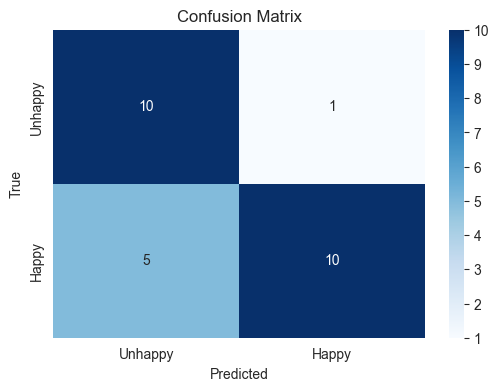

Confusion Matrix:
[[10  1]
 [ 5 10]]
{3143}


In [169]:
model = RandomForestClassifier(n_estimators=100, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
target_names = ['Unhappy', 'Happy']

print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)
print({seed})

### ExtraTreesClassifier

The ExtraTreesClassifier model was a close second to the RandomForest Classifier, with a fairly high recall score for Unhappiness at .91, and an overall accuracy score of .69. While the scores were slightly lower than previously shown with RandomForest, it still shows a high level of support for this model.

              precision    recall  f1-score   support

     Unhappy       0.59      0.91      0.71        11
       Happy       0.89      0.53      0.67        15

    accuracy                           0.69        26
   macro avg       0.74      0.72      0.69        26
weighted avg       0.76      0.69      0.69        26



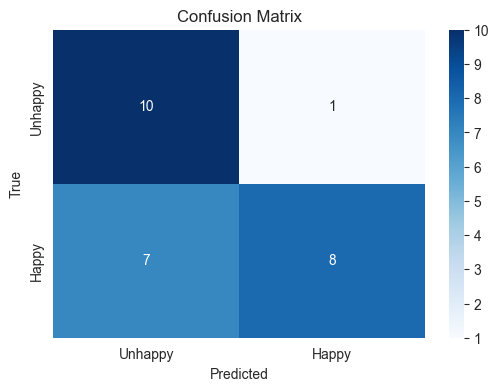

Confusion Matrix:
[[10  1]
 [ 7  8]]
{3143}


In [170]:
model = ExtraTreesClassifier(random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
target_names = ['Unhappy', 'Happy']

print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)
print({seed})

### LogisticRegression

Of the three models chosen to be used, LogisticRegression had the lowest overall support between the three, with a recall score of .45 for Unhappiness and an overall accuracy of .62 suggesting a more moderate level of overall support for this model. Even so, I feel this model is still an overall good fit for what is being tested and can be useful for making predictions regarding customer happiness.

              precision    recall  f1-score   support

     Unhappy       0.56      0.45      0.50        11
       Happy       0.65      0.73      0.69        15

    accuracy                           0.62        26
   macro avg       0.60      0.59      0.59        26
weighted avg       0.61      0.62      0.61        26



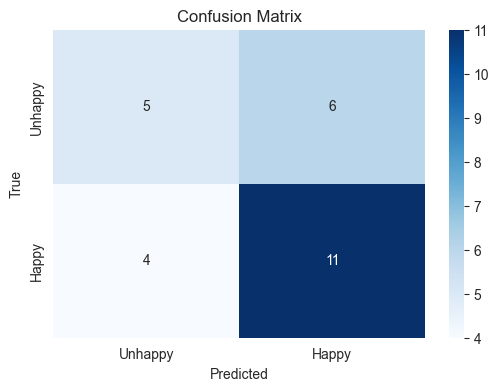

Confusion Matrix:
[[ 5  6]
 [ 4 11]]
{3143}


In [171]:
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
target_names = ['Unhappy', 'Happy']

print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)
print({seed})

#### Feature Engineering

With the models used above, I looked into using feature editing to see if it was possible to further improve the performance. The goal was to identify what three features seemed to have the biggest impact on the final results. The results suggest that X1, X5, and X6 are the most important features.

In [172]:
param_dist = {
    'n_estimators': randint(50, 200),  # Random search for the number of trees in the forest
    'max_depth': randint(5, 20),  # Random search for max depth of trees
    'min_samples_split': randint(2, 10),  # Random search for min samples to split a node
    'min_samples_leaf': randint(1, 10),  # Random search for min samples to be at leaf node
    'bootstrap': [True, False]  # Random search for bootstrap samples
}

rf = RandomForestClassifier(random_state=seed)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=100, cv=10, n_jobs=-1, scoring='recall', random_state=seed, verbose=2)

random_search.fit(X_train, y_train)

rf_best = random_search.best_estimator_
print(f'Best hyperparameters from RandomizedSearchCV: {random_search.best_params_}')

recall_scores = []
for n_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=rf_best, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    rf_best.fit(X_train_selected, y_train)
    y_pred = rf_best.predict(X_test_selected)
    report = classification_report(y_test, y_pred, target_names=['Unhappy', 'Happy'], output_dict=True)
    recall = report['Unhappy']['recall']
    recall_scores.append((n_features, recall))

best_n_features = max(recall_scores, key=lambda x: x[1])[0]
best_recall_score = max(recall_scores, key=lambda x: x[1])[1]
print(f'Optimal Number of Features: {best_n_features}')
print(f'Best recall score for Unhappy: {best_recall_score}')

rfe = RFE(estimator=rf_best, n_features_to_select=3)
fit = rfe.fit(X_train, y_train)

selected_features = X_train.columns[fit.support_]
print(f'Selected features: {selected_features}')

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
rf_best.fit(X_train_selected, y_train)

y_pred_final = rf_best.predict(X_test_selected)

print("Final Classification Report:")
print(classification_report(y_test, y_pred_final, target_names=['Unhappy', 'Happy']))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters from RandomizedSearchCV: {'bootstrap': True, 'max_depth': 19, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 74}
Optimal Number of Features: 1
Best recall score for Unhappy: 0.6363636363636364
Selected features: Index(['X1', 'X5', 'X6'], dtype='object')
Final Classification Report:
              precision    recall  f1-score   support

     Unhappy       0.56      0.45      0.50        11
       Happy       0.65      0.73      0.69        15

    accuracy                           0.62        26
   macro avg       0.60      0.59      0.59        26
weighted avg       0.61      0.62      0.61        26



### Ensembling

An initial test was done using ensembling with a VotingClassifier to see the results of combining all three models used for testing. While the results of combining the three models were close to the intended goal, there was still room to potentially improve the scores and obtain better results. The final results showed a recall score of .91 for Unhappy customers and an accuracy score of .77.


🔍 Classification Report: Ensemble (VotingClassifier)
              precision    recall  f1-score   support

     Unhappy       0.67      0.91      0.77        11
       Happy       0.91      0.67      0.77        15

    accuracy                           0.77        26
   macro avg       0.79      0.79      0.77        26
weighted avg       0.81      0.77      0.77        26



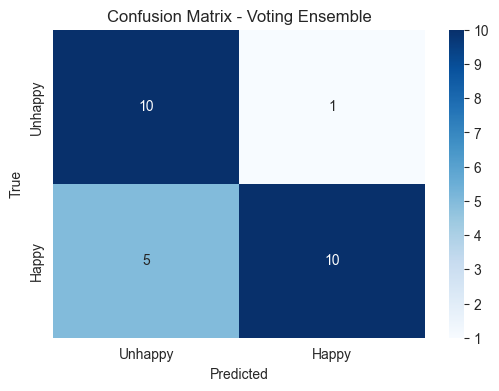

In [173]:
model1 = RandomForestClassifier(n_estimators=100, random_state=seed)
model2 = ExtraTreesClassifier(random_state=seed)
model3 = LogisticRegression(max_iter=1000, random_state=seed)

ensemble = VotingClassifier(
    estimators=[('rf', model1), ('et', model2), ('lr', model3)],
    voting='soft',
    n_jobs=-1
)

ensemble.fit(X_train_selected, y_train)

y_pred = ensemble.predict(X_test_selected)

target_names = ['Unhappy', 'Happy']
print("\n🔍 Classification Report: Ensemble (VotingClassifier)")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Voting Ensemble')
plt.show()

In [179]:
import numpy as np
from sklearn.metrics import classification_report

y_proba = ensemble.predict_proba(X_test_selected)[:, 1]  # Prob of "Happy"

for t in np.arange(0.3, 0.7, 0.05):
    y_pred = (y_proba >= t).astype(int)
    print(f"\nThreshold = {t:.2f}")
    print(classification_report(y_test, y_pred, target_names=['Unhappy', 'Happy']))


Threshold = 0.30
              precision    recall  f1-score   support

     Unhappy       0.89      0.73      0.80        11
       Happy       0.82      0.93      0.88        15

    accuracy                           0.85        26
   macro avg       0.86      0.83      0.84        26
weighted avg       0.85      0.85      0.84        26


Threshold = 0.35
              precision    recall  f1-score   support

     Unhappy       0.82      0.82      0.82        11
       Happy       0.87      0.87      0.87        15

    accuracy                           0.85        26
   macro avg       0.84      0.84      0.84        26
weighted avg       0.85      0.85      0.85        26


Threshold = 0.40
              precision    recall  f1-score   support

     Unhappy       0.75      0.82      0.78        11
       Happy       0.86      0.80      0.83        15

    accuracy                           0.81        26
   macro avg       0.80      0.81      0.81        26
weighted avg       0

### Improving the Threshold

After reviewing the results, I wanted to try and see if it was possible to improve the accuracy a tiny bit while also improving scores for the Unhappiness precision and the Happiness Recall. I decided to experiment slightly with threshold tuning while keeping the same model. After testing several threshold levels, I noticed that adjusting the threshold to .35 yielded good results. By changing this threshold, the Unhappiness Recall dropped slightly from .91 to .82, but accuracy was boosted further from .77 to .85. All the results are above .8 showing that even with the slight drop in Unhappiness, there is an extremely high level of support throughout for the models using this method.


🔍 Classification Report: Ensemble (VotingClassifier)
              precision    recall  f1-score   support

     Unhappy       0.82      0.82      0.82        11
       Happy       0.87      0.87      0.87        15

    accuracy                           0.85        26
   macro avg       0.84      0.84      0.84        26
weighted avg       0.85      0.85      0.85        26



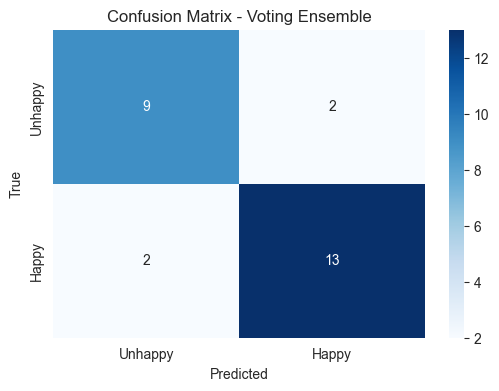

In [180]:
model1 = RandomForestClassifier(n_estimators=100, random_state=seed)
model2 = ExtraTreesClassifier(random_state=seed)
model3 = LogisticRegression(max_iter=1000, random_state=seed)

ensemble = VotingClassifier(
    estimators=[('rf', model1), ('et', model2), ('lr', model3)],
    voting='soft',
    n_jobs=-1
)

ensemble.fit(X_train_selected, y_train)

y_pred = (y_proba >= 0.35).astype(int)

target_names = ['Unhappy', 'Happy']
print("\n🔍 Classification Report: Ensemble (VotingClassifier)")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Voting Ensemble')
plt.show()

# Conclusion

The final results after using Feature Engineering suggest that the most important 'X' variables for determining whether a customer is Unhappy or Happy are X1, X5, and X6. These features are:

- X1: My order was delivered on time
- X5: I am satisfied with my courier
- X6: The app makes ordering easy for me

By identify and capturing these variables, it helped to improve the models slightly. Increasing the threshold was an improvement that helped reinforce this. The final Recall for Unhappiness for 91% with a 77% overall accuracy. I decided to experiment as well by lowering the threshold slightly to see if the recall could remain high while improving the others cores. By changing the threshold value to .35 from the base calculated value of .45, the overall results are much higher throughout and provide greater support for the model. The recall was lowered to .82 for Unhappiness but the accuracy rose further to .85. The other values increased as well with everything above 80%. Knowing that X1, X5, and X6 are most crucial for determining the final results, the other variables for X2, X3, and X4 can be left out of future results. The logistics company should put most of it's focus on determining successful on time deliveries, making sure their couriers are courteous, and that the app is always easy to use for anyone interested in using their services.